In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


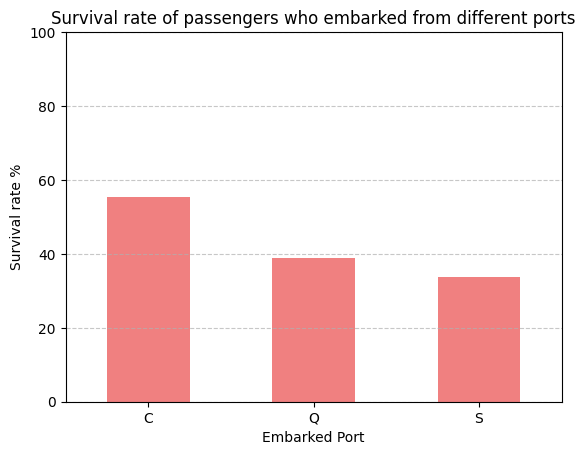

In [12]:
# Compare the survival rate of passengers who embarked from different ports (Embarked).
survival_rate = data.groupby("Embarked")["Survived"].mean()*100
survival_rate.plot(kind="bar",color = ("lightcoral"))
plt.title("Survival rate of passengers who embarked from different ports")
plt.ylabel("Survival rate %")
plt.xlabel("Embarked Port")
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\sumit\AppData\Local\Temp\ipykernel_17540\580223995.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Survival_rate = data.groupby("FareBin")["Survived"].mean()*100


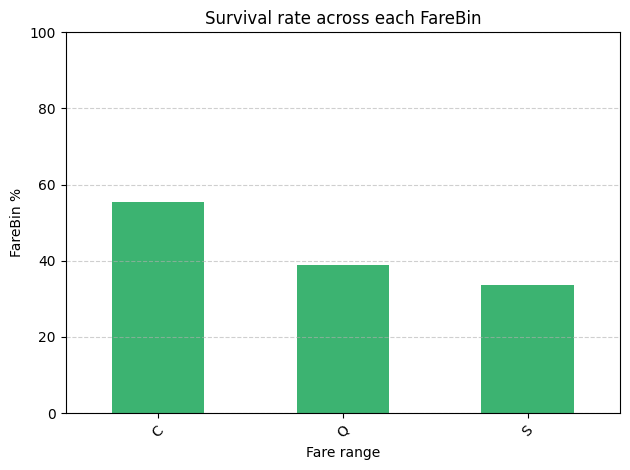

In [25]:
#Create a new column FareBin by binning the Fare into 4 equal intervals using pd.cut().
#Show how many passengers fall into each bin using value_counts().
#Then plot the survival rate across each FareBin.

data["FareBin"] = pd.cut(data["Fare"] , bins = 4 )         #pd.cut() splits continuous values into discrete bins.
data["FareBin"].value_counts()
Survival_rate = data.groupby("FareBin")["Survived"].mean()*100
survival_rate.plot(kind="bar", color = ("mediumseagreen"))
plt.title("Survival rate across each FareBin")
plt.ylabel("FareBin %")
plt.xlabel("Fare range")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [33]:
# Who are the top 5 oldest passengers who survived?
oldest_passengers = data[data["Survived"] == 1]
oldest_passengers_survived = oldest_passengers.sort_values(by ="Age" , ascending = False).head(5)
oldest_passengers_survived[["Name","Age","Sex","Pclass"]]

,Name,Age,Sex,Pclass
630,"Barkworth, Mr. Algernon Henry Wilson",80.0,male,1
275,"Andrews, Miss. Kornelia Theodosia",63.0,female,1
483,"Turkula, Mrs. (Hedwig)",63.0,female,3
570,"Harris, Mr. George",62.0,male,2
829,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,female,1


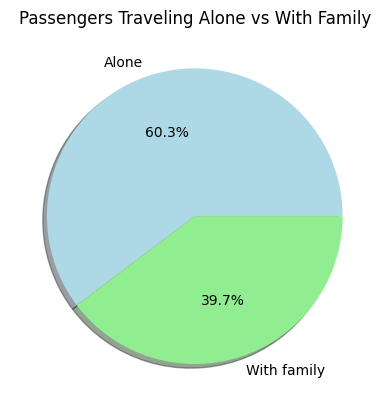

In [41]:
#How many passengers were traveling alone vs with family?
data["Alone"] = (data["SibSp"] + data["Parch"] == 0)       #==0 mean alone
data["Alone"].value_counts().plot.pie(
    labels=["Alone","With family"], 
    autopct="%1.1f%%",
    colors=["lightblue", "lightgreen"],
    shadow=True)
plt.title("Passengers Traveling Alone vs With Family")
plt.ylabel("")  # Hides y-label
plt.show()


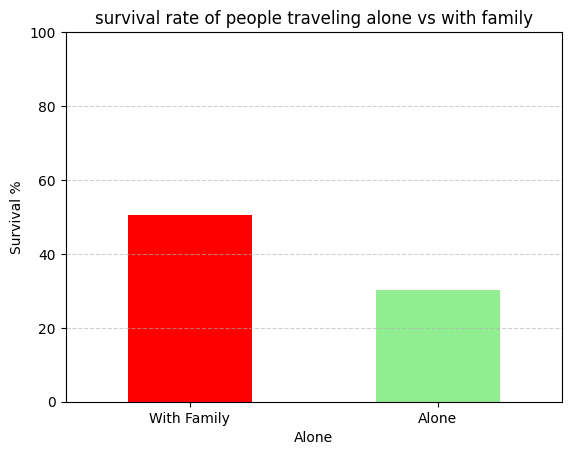

In [48]:
#What was the survival rate of people traveling alone vs with family?
data["Alone"] = (data["SibSp"] + data["Parch"] == 0)
survival_rate = data.groupby("Alone")["Survived"].mean()*100
survival_rate.plot(kind ="bar",color=("red","lightgreen"))
plt.title("survival rate of people traveling alone vs with family")
plt.ylabel("Survival %")
plt.xticks(ticks=[0, 1], labels=["With Family", "Alone"], rotation=0)
plt.ylim(0,100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

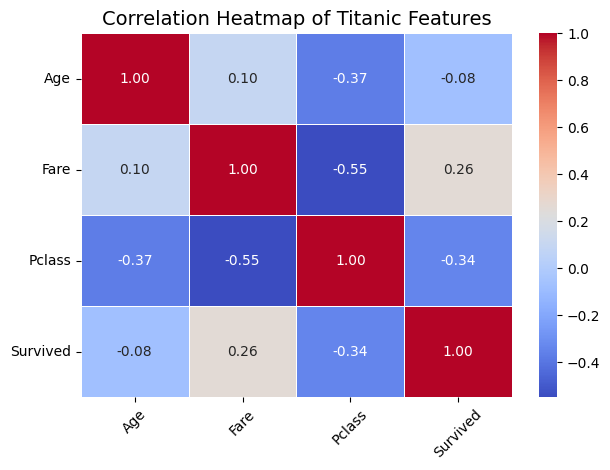

In [57]:
#Plot a heatmap to see correlation between Age, Fare, Pclass, and Survived.
relation = data[["Age","Fare","Pclass","Survived"]].corr()
sns.heatmap(relation , annot =True,cmap = "coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Index(['female', 'male'], dtype='object', name='Sex')


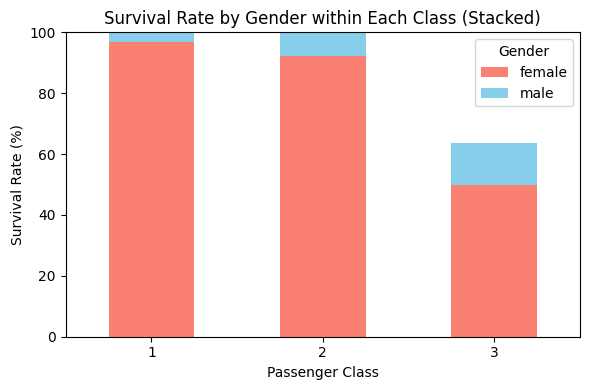

In [72]:
#What is the survival rate by gender within each passenger class?

survival_rate = data.groupby(["Pclass","Sex"])["Survived"].mean().unstack()*100
print(survival_rate.columns)
ax = survival_rate.plot(
    kind="bar",
    stacked=True,
    color=["salmon", "skyblue"],
    figsize=(6, 4)
)
plt.title("Survival Rate by Gender within Each Class (Stacked)")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Passenger Class")
plt.legend(title="Gender")  
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [74]:
#find the most common last name on the Titanic.

data["LastName"] = data["Name"].str.extract(r"^(\w+),")     #(r"^(\w+),") : it capture the lastname 
data["LastName"].value_counts().head(5)

LastName
Andersson    9
Sage         7
Goodwin      6
Johnson      6
Panula       6
Name: count, dtype: int64